# Predicting Customer Pregnancies with Logistic Regression

**迴歸分析**（英語：Regression Analysis）是一種統計學上分析數據的方法，目的在於了解兩個或多個變數間是否相關、相關方向與強度，並建立數學模型以便觀察特定變數來預測研究者感興趣的變數。 更具體的來說，迴歸分析可以幫助人們了解在只有一個自變數變化時因變數的變化量。

迴歸分析是建立因變數 $Y$（或稱依變數，反應變數）與自變數 $X$（或稱獨立變數，解釋變數）之間關係的模型。簡單線性回歸使用一個自變量 $X$，複迴歸使用超過一個自變量（$X_{1},X_{2}...X_{i}$）。--- Wikipedia [迴歸分析](https://zh.wikipedia.org/wiki/%E8%BF%B4%E6%AD%B8%E5%88%86%E6%9E%90)

**迴歸分析**屬於監督式學習中的一種。

**監督式學習**（英語：Supervised learning），是一種機器學習的方法，可以由訓練資料中學到或建立一個模式（函數 / learning model），並依此模式推測新的實例。訓練資料是由輸入物件（通常是向量）和預期輸出所組成。函數的輸出可以是一個連續的值（稱為**迴歸分析**），或是預測一個分類標籤（稱作**分類**）。 --- Wikipedia [監督式學習](https://zh.wikipedia.org/wiki/%E7%9B%A3%E7%9D%A3%E5%BC%8F%E5%AD%B8%E7%BF%92)

----

本週我們將練習利用簡單線性迴歸與邏輯迴歸（英語：Logistic Regression）進行分類學習。

假設你是會員制連鎖大賣場總部的行銷經理，負責嬰兒商品。若能找出可能家中有孕婦的顧客，便能針對潛在目標進行行銷。

可預期當顧客為孕婦（或家中有孕婦）時，其購買商品品項可能會與一般家庭不同。而你手上有的資料是會員的商品購買記錄，以及部份會員最近家中是否有孕婦的問卷記錄。（可來自顧客問卷調查，或從已經開始長期購買嬰幼兒紙尿布、奶粉的家庭，觀察其過去期間的購買記錄。）

你將利用此資料集，建立模型，來預測未來新顧客的購買記錄是否能透露「顧客是否為孕婦（或家中有孕婦）」。

# Model training

## Loading training data

為了建立迴歸模型，首先必須載入訓練資料集。

In [372]:
import pandas as pd

In [373]:
df = pd.read_csv("RetailMart.training.csv")
df.shape

(1000, 17)

資料框的維度看起來是1000X17, 每一欄是一種商品，最後一欄是懷孕與否，注意倒數第二欄是空欄。

In [374]:
df.head()

,Pregnancy Test,Birth Control,Feminine Hygiene,Folic Acid,Prenatal Vitamins,Prenatal Yoga,Body Pillow,Ginger Ale,Sea Bands,Stopped buying ciggies,Cigarettes,Smoking Cessation,Stopped buying wine,Wine,Maternity Clothes,Unnamed: 15,PREGNANT
0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,NaN,1
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,NaN,1
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,NaN,1
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,NaN,1
4,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,NaN,1


我們選取15項商品作為特徵(features)，懷孕與否作為反應變數。

In [375]:
X = df.iloc[:,:-2]  # 15 features
y = df.PREGNANT     # 1 response variable

## Model fitting with scikit-learn

我們可以利用scikit-learn套件中的linear model模組進行迴歸分析。(http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)

In [376]:
from sklearn import linear_model

In [401]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X, y)

# The coefficient of determination R^2
"R-squared: %.3f" % regr.score(X, y)

'R-squared: 0.452'

由訓練出來的模型中的迴歸係數，可看出哪些特徵具有很強的預測力：

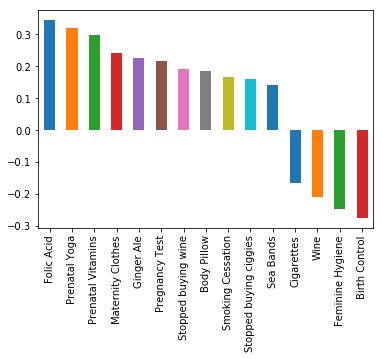

In [402]:
# The coefficients
coef = pd.Series(data=regr.coef_.ravel(), index=X.columns).sort_values(ascending=False)
coef.plot(kind='bar')

## Model fitting with statsmodels

註：使用statsmodels套件可以得到更詳細的統計結果。

To install this package with conda run: `conda install -c statsmodels statsmodels`

In [403]:
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               PREGNANT   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     54.07
Date:                Mon, 09 Apr 2018   Prob (F-statistic):          3.66e-117
Time:                        04:52:39   Log-Likelihood:                -425.22
No. Observations:                1000   AIC:                             882.4
Df Residuals:                     984   BIC:                             961.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

# Model testing

## Loading testing data

迴歸模型建立後，便可載入測試資料實際預測看看此模型表現如何。

In [404]:
df2 = pd.read_csv("RetailMart.testing.csv")
df2.shape

(1000, 17)

In [405]:
df2.head()

,Pregnancy Test,Birth Control,Feminine Hygiene,Folic Acid,Prenatal Vitamins,Prenatal Yoga,Body Pillow,Ginger Ale,Sea Bands,Stopped buying ciggies,Cigarettes,Smoking Cessation,Stopped buying wine,Wine,Maternity Clothes,Unnamed: 15,PREGNANT
0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,NaN,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,1
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,NaN,1
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,1


In [406]:
X_test = df2.iloc[:,:-2]  # 15 features
y_test = df2.PREGNANT.values     # 1 response variable

## Prediction with scikit-learn

以之前訓練好的模型，套用至新的測試資料上進行預測，得到預測答案y_pred.

In [407]:
import sklearn.metrics

In [408]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f" % sklearn.metrics.mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % sklearn.metrics.r2_score(y_test, y_pred))

Mean squared error: 0.13
Variance score: -1.23


## ROC Curve

以ROC Curve判斷預測結果是否良好。

“A receiver operating characteristic (ROC), or simply ROC curve, is a graphical plot which illustrates the performance of a binary classifier system as its discrimination threshold is varied. It is created by plotting the fraction of true positives out of the positives (TPR = true positive rate) vs. the fraction of false positives out of the negatives (FPR = false positive rate), at various threshold settings. TPR is also known as sensitivity, and FPR is one minus the specificity or true negative rate.” --- [Wikipedia](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)

The `roc_auc_score` function computes the area under the ROC curve, which is also denoted by AUC or AUROC. By computing the area under the roc curve, the curve information is summarized in one number. 

In [409]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def draw_ROC_curve(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc = 'lower right')
    plt.gca().set_aspect('equal', 'box')
    
    return auc

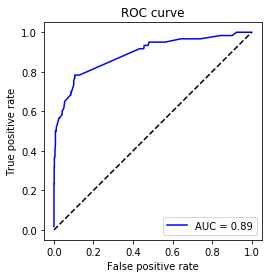

In [410]:
auc = draw_ROC_curve(y_test, y_pred)

# Questions

請改用Logistic Regression建立分類預測模型, 在同一組測試資料集下，分類預測的AUC為何？若輸出改為預測機率(`predict_proba`)其AUC又為何？

若有一名新顧客來店裡消費，只買了葉酸(Folic Acid)與孕婦維他命(Prenatal Vitamins), 她被認為是孕婦的機率有多高？

Hint: Check http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

**Bonus:** 自由發揮設計新模型（不限於迴歸模型），以挑戰得到超過 AUC>0.9 的表現。解釋你的作法並說明該模型的優點。